In [1]:
import fin_helpers as helper
import pandas as pd



In [2]:
from vnstock import Listing
list = Listing(source='vci')
VN30 = list.symbols_by_group('VN30').tolist()

In [3]:
tickers = [t for t in VN30]
#tickers = ['ACB', 'VIC', 'HPG']
day_range = 520


In [6]:
from fin_helpers.fetching.fetch_info import fetch_stock
panel = fetch_stock(tickers, hist=day_range,interval='1d', combine = False)
panel

Processing batch ['ACB' 'BCM' 'BID' 'CTG' 'DGC' 'FPT' 'GAS' 'GVR' 'HDB' 'HPG' 'LPB' 'MBB'
 'MSN' 'MWG' 'PLX']
Done!

Processing batch ['SAB' 'SHB' 'SSB' 'SSI' 'STB' 'TCB' 'TPB' 'VCB' 'VHM' 'VIB' 'VIC' 'VJC'
 'VNM' 'VPB' 'VRE']
Done!



{np.str_('ACB'):           time   open   high    low  close    volume
 0   2024-07-10  20.47  20.47  20.26  20.26   6484698
 1   2024-07-11  20.34  20.34  20.18  20.18   5001133
 2   2024-07-12  20.14  20.18  19.88  20.05   7160694
 3   2024-07-15  20.05  20.09  19.97  20.01   4490958
 4   2024-07-16  20.05  20.30  20.01  20.14   7002765
 ..         ...    ...    ...    ...    ...       ...
 370 2025-12-30  24.00  24.20  23.90  24.10   5337300
 371 2025-12-31  24.15  24.25  23.90  24.00   5932900
 372 2026-01-05  24.00  24.10  23.85  24.00   8986200
 373 2026-01-06  24.05  24.10  23.75  24.00  12736300
 374 2026-01-07  24.20  24.75  24.10  24.55  14848800
 
 [375 rows x 6 columns],
 np.str_('BCM'):           time   open   high    low  close   volume
 0   2024-07-10  65.80  65.80  64.32  64.32   756999
 1   2024-07-11  65.01  65.11  63.73  63.73   604247
 2   2024-07-12  64.03  64.52  63.63  64.03   576282
 3   2024-07-15  64.52  66.49  64.22  66.19  1533340
 4   2024-07-16  66.68  67.8

In [7]:
parent = []
for t in panel:
    stock = panel[t]
    stock['ret'] = (stock['close'].pct_change())
    stock['ticker'] = t
    parent.append(stock[['time','ticker', 'close', 'ret']])

sharpe_panel = pd.concat(parent)
sharpe_panel

,time,ticker,close,ret
0,2024-07-10,ACB,20.26,NaN
1,2024-07-11,ACB,20.18,-0.003949
2,2024-07-12,ACB,20.05,-0.006442
3,2024-07-15,ACB,20.01,-0.001995
4,2024-07-16,ACB,20.14,0.006497
...,...,...,...,...
370,2025-12-30,VRE,32.80,-0.012048
371,2025-12-31,VRE,33.65,0.025915
372,2026-01-05,VRE,35.60,0.057949
373,2026-01-06,VRE,38.05,0.068820


In [13]:
summary_panel = sharpe_panel.groupby('ticker')['ret'].agg(['mean','std', 'var'])
summary_panel['sharpe'] = summary_panel['mean']/summary_panel['std']
summary_panel.sort_values('sharpe', ascending=False)

,mean,std,var,sharpe
ticker,,,,
VIC,0.006084,0.026267,0.000690,0.231624
VHM,0.003858,0.025841,0.000668,0.149285
VJC,0.002184,0.021388,0.000457,0.102099
SHB,0.001859,0.019325,0.000373,0.096195
MBB,0.001645,0.017343,0.000301,0.094873
CTG,0.001520,0.016612,0.000276,0.091503
HDB,0.001858,0.020801,0.000433,0.089310
STB,0.001772,0.020784,0.000432,0.085248
LPB,0.001577,0.019488,0.000380,0.080903


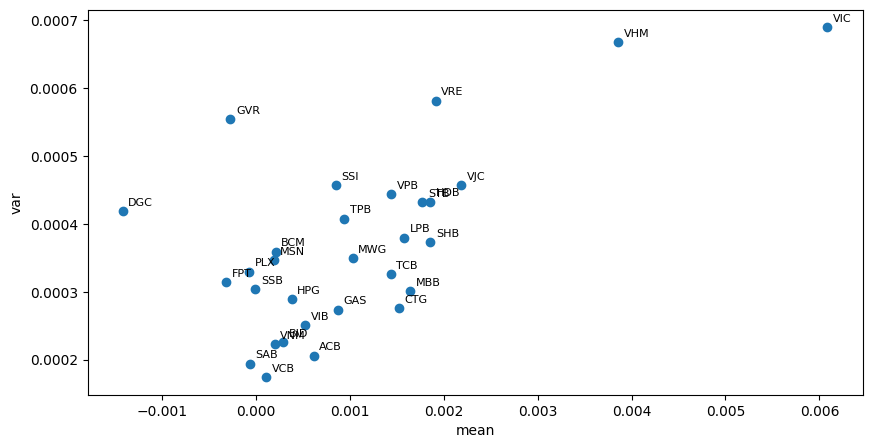

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(summary_panel["mean"], summary_panel["var"])

for x, y, label in zip(summary_panel["mean"], summary_panel["var"], summary_panel.index):
    plt.annotate(label, (x, y), xytext=(4, 4), textcoords="offset points", fontsize=8)

plt.xlabel("mean")
plt.ylabel("var")
plt.show()

In [9]:
import itertools

combos = itertools.combinations(VN30, 3)

In [10]:
from IPython.display import clear_output    
from fin_helpers.finana.mpt import mpt_sim 
import sys
final = []
for combo in combos:
    clear_output(wait=True)
    print(f"Simulating combo: {combo}")    
    panel = sharpe_panel[sharpe_panel['ticker'].isin(combo)]
    out = mpt_sim(panel, 1000)
    final.append(out)

Simulating combo: ('VNM', 'VPB', 'VRE')
Index(['VNM', 'VPB', 'VRE'], dtype='object', name='ticker')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
fin = pd.concat(final)
top = fin.sort_values(['Return', 'Volatility'], ascending=[False, True]).head(1000)
fin['sharpe'] = fin['Return'] / fin['Volatility']
#plt.scatter(each['Volatility'], each['Return'])

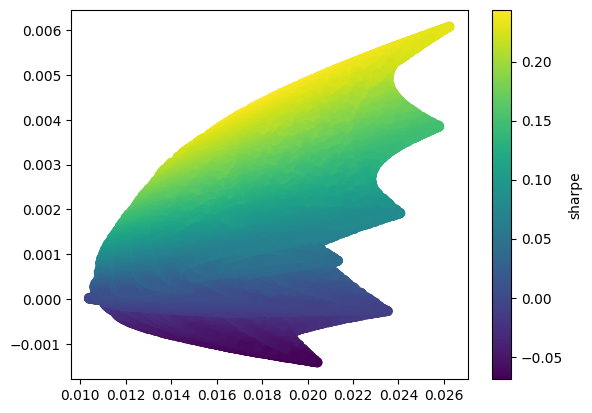

In [15]:
plt.scatter(fin['Volatility'], fin['Return'], c=fin['sharpe'])
plt.colorbar(label='sharpe')
